<h1 style = "text-align: left">[W6] [DS4A]  Nexans - Basic Exploratory Data Analysis (EDA) </h1>


<h2 style = "text-align: left">Nexans Colombia | Team # 22</h2>

<h4 style = "text-align: left">Andres Fabian Osorio, Aron Forero, Camilo Castellanos, Guillermo Castillo, Jairo Bautista, Jorge Florez, Nicolás López </h4>

<h2 style = "text-align: left">Case Introduction</h2>


<p> 

**Business Context.**  Nexans Colombia is an electrical wiring and telecommunications world-class manufacturer. Nexans Colombia has been growing significantly over the last 13 years. They have contacted DS4A students to help them understand the variation in demand of electrical wiring on the market so that they can foresee the supply chain better. Nexans is interested in learning how external factors such as the metal stock market, currency and building GDP affect their sales.
</p>
<br>
<p>

**Business Problem.** The company would like DS4A data scientists to answer the following questions: **“What’s the product families’ demand variation on a fixed period (monthly, quarterly, yearly) for the market segments?”**, **“Is there any client clusterization based on customer behaviour different than the current customer segments on the company?”** and **“Are there any external factors that can influentiate the electrical wiring demand?**
</p>
<br>
<p> 

**Analytical Context.** Thus the scenario above can be common amongst manufacturing businesses, aligning offer and demand might be a very complex problem to solve, as it would represent a business crystal ball. As a first approach, DS4A data scientists begin a preliminary Exploratory Data Analysis (EDA) on Nexans Colombia historical sales by opening the CSV file on Jupyter Notebook, followed by initial column descriptions and name cleaning. Later on, we proceed by checking null values and a relevant variables analysis. Finally we graph sales per year to give a full picture of the current dataset.
</p>


<h2>Market Trend Forecast </h2>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)

<h2>What are the datasets that participants will consider to use to solve this problem?</h2>

<p><strong>Dataset that participants can access to solve the problem.</strong> 
Historical sales of the company and a forecast already built in the company.</p>


<h1 style="color: #5e9ca0;"><span style="color: #2b2301;">Variable definition</span></h1>
<p>&nbsp;</p>
<ol>
<li>Entrega: Is the id of delivery.</li>
<li>Documento de ventas: Is the id of sale&acute;s document</li>
<li>Factura: The identifier of bill</li>
<li>Nombre Destinatario Mc&iacute;as: The name of person or business name that receives the product</li>
<li>Destinatario mc&iacute;a: Nit of person or business name that receives the product</li>
<li>Fecha Reparto: Date of delivery</li>
<li>Fecha Transporte: Pending</li>
<li>Fecha factura: Date of bill</li>
<li>Factura_1: Other number of factura.</li>
<li>Material: Id of material</li>
<li>Texto breve de material: Short text of material</li>
<li>Cantidad entrega: Quantity of product delivery</li>
<li>Un.medida venta: Unit of measire of product</li>
<li>Peso bruto: Gross weight of the delivered product including the tara (packing of product)</li>
<li>Peso Bruto: Other gross weight of the delivered product</li>
<li>Peso Tara: Gross weight of the tara (Packing of product|)</li>
<li>Peso Neto: Gross weight of the delivered product without the tara (packing of product)</li>
<li>MC Al Kg: Amount of aluminium on product</li>
<li>MC Cu Kg: Amount of cooper on product</li>
<li>Moneda del documento: currency of the document (bill)</li>
<li>Unidad-salida: Unit of measure of deparrture</li>
<li>Valor Neto (USD): Values of sale before TAX</li>
<li>Fecha de Pedido: Date of the order</li>
<li>Fecha Entrega: Date of delivery</li>
<li>Stock a Pedidos:Order type</li>
<li>Precio Cliente: Customer price product</li>
<li>Precio Neto:Pending</li>
<li>Vendedor: name of the selling agent</li>
<li>Grupo Clientes: Group of clients of the company.</li>
<li>C&oacute;digo EAN/UPC: Barcode of the product</li>
<li>Calle y n&uacute;mero: Adress of the customer</li>
<li>Distrito: Distructo of the customer</li>
<li>Poblaci&oacute;n: City of the customer</li>
<li>Pais: Country of the customer</li>
<li>Valor Moneda Local: Value in COP</li>
<li>Moneda: Currency of the bill</li>
</ol>

In [4]:
# load csv dataset
df = pd.read_csv("drive/My Drive/DS4A/data/consolidado pag 2.csv", delimiter = ';')
rename_columns = {
   'Destinatario mcía.': 'Destinatario mcia',
   'Posición docto ventas': 'Posicion docto ventas',
    'Un.medida venta': 'Un. medida venta',
    'Stock a  Pedidos': 'Stock a Pedidos',
    'GRUPO MATERIALES 2': 'Grupo Materiales 2',
    'Grupo  Clientes': 'Grupo Clientes',
    'METROS': 'Metros',
    'PRODUCT ABC': 'Product ABC',
    'CUSTOMER ABC': 'Customer ABC',
    'MARKET LINE': 'Market Line'
}
df.rename(columns=rename_columns, inplace=True)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,15,16,21,22,28,29,31,42,44,58,65,68,69) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head(5)

,Entrega,Documento de ventas,Factura,Remito,Nombre Destinatario Mcías,Destinatario mcia,Fecha Reparto,Posicion docto ventas,Estado aprobación factura,Empresa Transporte,Fecha Transporte,Fecha factura,Factura.1,Nota Cabecera,Fe.mov.mcía.real,T Flete,Acreedor,Material,Texto breve de material,Lote,Matricula,Tipo Carrete,Cantidad entrega,Un. medida venta,Peso bruto,Peso Bruto,Peso Tara,Peso Neto,Punto fin,Punto inicio,Ctd.clasificable,Fecha-tratamiento,Centro,MC Al Kg,MC Cu Kg,Moneda del documento,Nº de pedido,Nº de pedido.1,Número de material del cliente,Posición,Tipo de posición,Unidad-salida,Unidades Recepción,Valor Neto (USD),Nº ident.fis.1,Valor de Picking,Fecha de Pedido,Fecha Entrega,Stock a Pedidos,Precio Cliente,Precio Neto,Creado por,Vendedor,Grupo de material 2,Grupo Materiales 2,Grupo Clientes,Punto Expedicion,Ruta,Código EAN/UPC,Calle y número,Distrito,Población,Pais,Valor Moneda Local,Moneda,Incoterms,Nombre 1,Carrete,Valor Carrete,Precio
0,80790344,333760.0,F00300097181,0.0,MUÑOZ Y CIA S.A.S,807004467,14/01/2015,10,NO REQUIERE APROB.,RED ESPECIALIZADA DE TRANSPORTE,26/01/2015,24/01/2015,90575972.0,0,23/01/2015,1/11.1,7.1/6.,10011383,C.2AWG (B) THHN/THWN-2 TC 600V 90ºC NE,CED-210046,BC7H936,0,570,M,"196,612",216,20,196,258,828,570,0/01/1900,5010,0,"168,62",COP,OC. 389 - 391,OC. 389 - 391,0.0,900001,ZTA1,KG,0,144390,8070044671,3316830,22/12/2014,2/01/2015,STOCK,"33168,01","58,19",APERALTA,ZARAMA HERNÁN,417.0,Nexans CO C 8 - 4/0 AWG THHN/T,Distrib. y retail,Cedsa Bodega Comercial,Cúcuta,"7,70735E+12",AVENIDA 1 19 61 BRR BLANCO,CUCUTA,CUCUTA,Colombia,3316830,COP,0,0.0,0.0,0,999999
1,80790344,333760.0,F00300097181,0.0,MUÑOZ Y CIA S.A.S,807004467,14/01/2015,20,NO REQUIERE APROB.,RED ESPECIALIZADA DE TRANSPORTE,26/01/2015,24/01/2015,90575972.0,0,23/01/2015,1/11.1,7.1/6.,10011381,C.1/0AWG (B) THHN/THWN-2 TC 600V 90ºC NE,CED-210047,CF5A092,0,200,M,"108,033",115,7,108,300,100,200,0/01/1900,5010,0,"94,57",COP,OC. 389 - 391,OC. 389 - 391,0.0,900002,ZTA1,KG,0,82703,8070044671,1899800,22/12/2014,2/01/2015,STOCK,"18997,94","94,99",APERALTA,ZARAMA HERNÁN,417.0,Nexans CO C 8 - 4/0 AWG THHN/T,Distrib. y retail,Cedsa Bodega Comercial,Cúcuta,"7,70735E+12",AVENIDA 1 19 61 BRR BLANCO,CUCUTA,CUCUTA,Colombia,1899800,COP,0,0.0,0.0,0,999999
2,80790344,333760.0,F00300097181,0.0,MUÑOZ Y CIA S.A.S,807004467,14/01/2015,30,NO REQUIERE APROB.,RED ESPECIALIZADA DE TRANSPORTE,26/01/2015,24/01/2015,90575972.0,0,23/01/2015,1/11.1,7.1/6.,10011403,C.4/0AWG (B) THHN/THWN-2 TC 600V 90ºC NE,CED-210048,EP11U273,0,800,M,"826,4",870,46,824,247,1047,800,0/01/1900,5010,0,"754,88",COP,OC. 389 - 391,OC. 389 - 391,0.0,900003,ZTA1,KG,0,648180,8070044671,14889600,22/12/2014,2/01/2015,STOCK,"241951,25","186,12",APERALTA,ZARAMA HERNÁN,417.0,Nexans CO C 8 - 4/0 AWG THHN/T,Distrib. y retail,Cedsa Bodega Comercial,Cúcuta,"7,70735E+12",AVENIDA 1 19 61 BRR BLANCO,CUCUTA,CUCUTA,Colombia,14889600,COP,0,0.0,0.0,0,999999
3,80790344,333760.0,F00300097181,0.0,MUÑOZ Y CIA S.A.S,807004467,14/01/2015,30,NO REQUIERE APROB.,RED ESPECIALIZADA DE TRANSPORTE,26/01/2015,24/01/2015,90575972.0,0,23/01/2015,1/11.1,7.1/6.,10011403,C.4/0AWG (B) THHN/THWN-2 TC 600V 90ºC NE,1001076140,BC8G 685,0,500,M,"516,5",542,0,516,500,0,500,0/01/1900,5010,0,"471,8",COP,OC. 389 - 391,OC. 389 - 391,0.0,900004,ZTA1,KG,0,405112,8070044671,9306000,22/12/2014,2/01/2015,STOCK,"241951,25","186,12",APERALTA,ZARAMA HERNÁN,417.0,Nexans CO C 8 - 4/0 AWG THHN/T,Distrib. y retail,Cedsa Bodega Comercial,Cúcuta,"7,70735E+12",AVENIDA 1 19 61 BRR BLANCO,CUCUTA,CUCUTA,Colombia,9306000,COP,0,0.0,0.0,0,999999
4,80790325,334045.0,F00300096410,0.0,RIOPAILA CASTILLA S.A.,900087414,2/01/2015,10,NO REQUIERE APROB.,RED ESPECIALIZADA DE TRANSPORTE,5/01/2015,3/01/2015,90572704.0,0,2/01/2015,0,0,10027791,3X18+22AWG INST TFN 600V 90C PPa TC,CED-210037,CF4A163,0,300,M,"19,305",21,2,19,722,1022,300,0/01/1900,5010,0,"7,77",COP,2000261795,2000261795,0.0,900001,ZTA1,KG,0,27488,9000874144,648300,29/12/2014,2/01/2015,STOCK,6483,"21,61",APERALT

Next tables we describe the type and quality of data using the .info() and .describe() functions from pandas.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344720 entries, 0 to 344719
Data columns (total 70 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Entrega                         344720 non-null  int64  
 1   Documento de ventas             344690 non-null  float64
 2   Factura                         279136 non-null  object 
 3   Remito                          52202 non-null   float64
 4   Nombre Destinatario Mcías       344720 non-null  object 
 5   Destinatario mcia               344720 non-null  object 
 6   Fecha Reparto                   344720 non-null  object 
 7   Posicion docto ventas           344720 non-null  int64  
 8   Estado aprobación factura       344720 non-null  object 
 9   Empresa Transporte              270333 non-null  object 
 10  Fecha Transporte                286757 non-null  object 
 11  Fecha factura                   344720 non-null  object 
 12  Factura.1       

In [7]:
df.describe()

,Entrega,Documento de ventas,Remito,Posicion docto ventas,Factura.1,Material,Peso Bruto,Peso Tara,Peso Neto,Ctd.clasificable,Centro,Número de material del cliente,Posición,Valor Neto (USD),Grupo de material 2,Valor Moneda Local,Nombre 1,Carrete
count,3.447200e+05,3.446900e+05,52202.0,344720.000000,2.791360e+05,3.447200e+05,344720.000000,344720.000000,344720.000000,344720.000000,344720.000000,6.962300e+04,344720.000000,3.447200e+05,331689.000000,3.447200e+05,52202.0,52202.0
mean,8.110665e+07,8.467397e+08,0.0,109.920277,8.998288e+07,1.122551e+07,169.597122,4.166709,150.023999,456.928179,5008.627002,8.183022e+04,533872.256048,4.160867e+06,418.076659,1.196268e+08,0.0,0.0
std,1.283985e+05,1.805842e+09,0.0,191.760728,8.500937e+06,8.909469e+06,1664.012079,24.968969,1358.554314,1260.802728,4.095906,2.810541e+05,442086.061134,8.530995e+07,36.038532,2.485039e+09,0.0,0.0
min,8.079032e+07,3.283200e+05,0.0,1.000000,0.000000e+00,1.001104e+07,0.000000,0.000000,0.000000,0.000000,5000.000000,0.000000e+00,10.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.0
25%,8.101918e+07,4.239410e+05,0.0,10.000000,9.071308e+07,1.001149e+07,0.000000,0.000000,0.000000,0.000000,5010.000000,0.000000e+00,70.000000,1.130000e+03,404.000000,2.186500e+03,0.0,0.0
50%,8.113621e+07,4.654440e+05,0.0,40.000000,9.080816e+07,1.002475e+07,37.000000,0.000000,32.000000,250.000000,5010.000000,0.000000e+00,900001.000000,2.806600e+04,416.000000,8.394000e+05,0.0,0.0
75%,8.120975e+07,4.963340e+05,0.0,120.000000,9.085876e+07,1.003672e+07,187.000000,0.000000,167.000000,503.000000,5010.000000,2.741980e+05,900006.000000,9.591525e+04,423.000000,2.948000e+06,0.0,0.0
max,8.127437e+07,4.700070e+09,0.0,2280.000000,9.090319e+07,8.000632e+07,786000.000000,2000.000000,553000.000000,450000.000000,5020.000000,1.003518e+07,900444.000000,9.807716e+09,999.000000,2.918374e+11,0.0,0.0


In [8]:
df.describe(include=['O'])

,Factura,Nombre Destinatario Mcías,Destinatario mcia,Fecha Reparto,Estado aprobación factura,Empresa Transporte,Fecha Transporte,Fecha factura,Nota Cabecera,Fe.mov.mcía.real,T Flete,Acreedor,Texto breve de material,Lote,Matricula,Tipo Carrete,Cantidad entrega,Un. medida venta,Peso bruto,Punto fin,Punto inicio,Fecha-tratamiento,MC Al Kg,MC Cu Kg,Moneda del documento,Nº de pedido,Nº de pedido.1,Tipo de posición,Unidad-salida,Unidades Recepción,Nº ident.fis.1,Valor de Picking,Fecha de Pedido,Fecha Entrega,Stock a Pedidos,Precio Cliente,Precio Neto,Creado por,Vendedor,Grupo Materiales 2,Grupo Clientes,Punto Expedicion,Ruta,Código EAN/UPC,Calle y número,Distrito,Población,Pais,Moneda,Incoterms,Valor Carrete,Precio
count,279136,344720,344720,344720,344720,270333,286757,344720,54358,341736,52202,52202,344720,212098,211094,52229,344720,344720,344720,172469,172548,101156,344720,344720,284261,284132,284132,344720,344720,344720,344527,344720,298292,344638,344720,344720,344720,284261,284261,331689,284261,344720,284082,263730,343022,162940,338645,344720,284261,55446,344720,344720
unique,55053,863,841,1991,2,21,1448,1744,403,1700,315,246,3327,165465,154603,57,8629,6,45613,13842,13515,1,8196,24463,4,31974,31974,7,1,17,1107,80820,1556,1715,2,77531,17705,17,14,37,8,3,48,1298,890,44,177,18,2,46,3,4
top,0,Bodega Comercial CEDSA,CEDSA5010,25/10/2019,NO REQUIERE APROB.,COTRASUR,0/01/1900,26/12/2018,0,0/01/1900,0,0,1X8+8AWG ACOMCONC XLPE600V90C XLPE USE-M,0,0,0,500,M,"102,671",0,0,0/01/1900,0,0,COP,0,0,ZTA1,KG,0,8902096126,0,0/01/1900,20/04/2020,STOCK,0,0,MPINILLA,ZARAMA HERNÁN,Nexans CO Alambre de Cobre THH,Distrib. y retail,Cedsa Bodega Comercial,Bogota,"7,70735E+12","Manzana B, Km 3 Vía Palenque C",0,Bucaramanga,Colombia,COP,0,0,0
freq,2469,54672,54672,1156,276667,99217,20295,1198,51324,1032,35818,35818,14279,7622,8182,52154,69257,323508,4915,18726,41150,101156,213934,29901,259137,1642,1642,161540,344720,221840,56949,39313,15673,1039,264167,39313,39313,86500,164219,56510,195051,280390,84324,91688,39230,29222,66546,340353,282619,43261,221840,216024


## Null Values Analysis of the Full Dataset

This is necessary to know the data that we are going to use in our analysis.  
The next cell shows how many percentages units are Null/missing values in each of the columns of our dataset.

In [9]:
print('Null Percentage of each variable: \n')
null_percentage = (df.isnull().sum()/df.shape[0])*100
null_percentage[null_percentage != 0]

Null Percentage of each variable: 



Documento de ventas                0.008703
Factura                           19.025296
Remito                            84.856695
Empresa Transporte                21.578963
Fecha Transporte                  16.814516
Factura.1                         19.025296
Nota Cabecera                     84.231260
Fe.mov.mcía.real                   0.865630
T Flete                           84.856695
Acreedor                          84.856695
Lote                              38.472383
Matricula                         38.763634
Tipo Carrete                      84.848863
Punto fin                         49.968380
Punto inicio                      49.945463
Fecha-tratamiento                 70.655605
Moneda del documento              17.538582
Nº de pedido                      17.576004
Nº de pedido.1                    17.576004
Número de material del cliente    79.803029
Nº ident.fis.1                     0.055987
Fecha de Pedido                   13.468322
Fecha Entrega                   

**Effective sales dataset**

We are going to create a new dataset only with the efective orders. To create the new dataset we filter out by the "Factura" column, taking only values that are not null or "0" and "Valor Moneda Local" column value is not "0".

*The effective sales represent aprox. 73% of the total orders reported*

In [11]:
df_ventas = df[(df["Factura"].notnull()) & (df["Factura"] != "0") & (df["Valor Moneda Local"] != 0)]

In [12]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253933 entries, 0 to 344563
Data columns (total 70 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Entrega                         253933 non-null  int64  
 1   Documento de ventas             253933 non-null  float64
 2   Factura                         253933 non-null  object 
 3   Remito                          44513 non-null   float64
 4   Nombre Destinatario Mcías       253933 non-null  object 
 5   Destinatario mcia               253933 non-null  object 
 6   Fecha Reparto                   253933 non-null  object 
 7   Posicion docto ventas           253933 non-null  int64  
 8   Estado aprobación factura       253933 non-null  object 
 9   Empresa Transporte              245427 non-null  object 
 10  Fecha Transporte                246790 non-null  object 
 11  Fecha factura                   253933 non-null  object 
 12  Factura.1       

In the data set supplied by Nexans we found some columns that do not present relevant information for the development of the solution, therefore we decided to remove them from the analysis:

- "Remito"
- "Posicion docto ventas"
- "Estado aprobación factura"
- "Empresa Transporte"
- "Nota Cabecera"
- "Fe.mov.mcía.real"
- "T Flete"
- "Acreedor"
- "Lote"
- "Matricula"
- "Tipo Carrete"
- "Punto fin"
- "Punto inicio"
- "Ctd.clasificable"
- "Fecha-tratamiento"
- "Centro"
- "Nº de pedido"
- "Nº de pedido.1"
- "Número de material del cliente"
- "Posición"
- "Tipo de posición"
- "Unidades Recepción"
- "Nº ident.fis.1"
- "Valor de Picking"
- "Creado por"
- "Punto Expedicion"
- "Ruta"
- "Incoterms"
- "Nombre 1"
- "Carrete"
- "Valor Carrete"
- "Precio"

In [13]:
df_ventas.drop(["Remito","Posicion docto ventas","Estado aprobación factura","Empresa Transporte","Nota Cabecera","Fe.mov.mcía.real","T Flete","Acreedor","Lote","Matricula","Tipo Carrete","Punto fin","Punto inicio","Ctd.clasificable","Fecha-tratamiento","Centro","Nº de pedido","Nº de pedido.1","Número de material del cliente","Posición","Tipo de posición","Unidades Recepción","Nº ident.fis.1","Valor de Picking","Creado por","Punto Expedicion","Ruta","Incoterms","Nombre 1","Carrete","Valor Carrete","Precio"], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253933 entries, 0 to 344563
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Entrega                    253933 non-null  int64  
 1   Documento de ventas        253933 non-null  float64
 2   Factura                    253933 non-null  object 
 3   Nombre Destinatario Mcías  253933 non-null  object 
 4   Destinatario mcia          253933 non-null  object 
 5   Fecha Reparto              253933 non-null  object 
 6   Fecha Transporte           246790 non-null  object 
 7   Fecha factura              253933 non-null  object 
 8   Factura.1                  253933 non-null  float64
 9   Material                   253933 non-null  int64  
 10  Texto breve de material    253933 non-null  object 
 11  Cantidad entrega           253933 non-null  object 
 12  Un. medida venta           253933 non-null  object 
 13  Peso bruto                 25

### Null/Missing Values New Dataset
We need to check the Null/Missing Values in our new filtered Dataset

In [15]:
print('Null Percentage of each variable: \n')
null_percentage = (df_ventas.isnull().sum()/df_ventas.shape[0])*100
null_percentage[null_percentage != 0]

Null Percentage of each variable: 



Fecha Transporte     2.812947
Fecha Entrega        0.032292
Código EAN/UPC      13.817818
Calle y número       0.000394
Distrito            46.722561
dtype: float64

The amount of Null/Missing values fell considerably, now there are less columns with null values and except for 'Distrito' the other variables has got just a few null values.

**The value of each order is variable of our interest, the client wants to be able to predict the total sales per month.**


We are using "Valor Moneda Local" to do some inital exploration to see which client group has the most weight on the sales.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

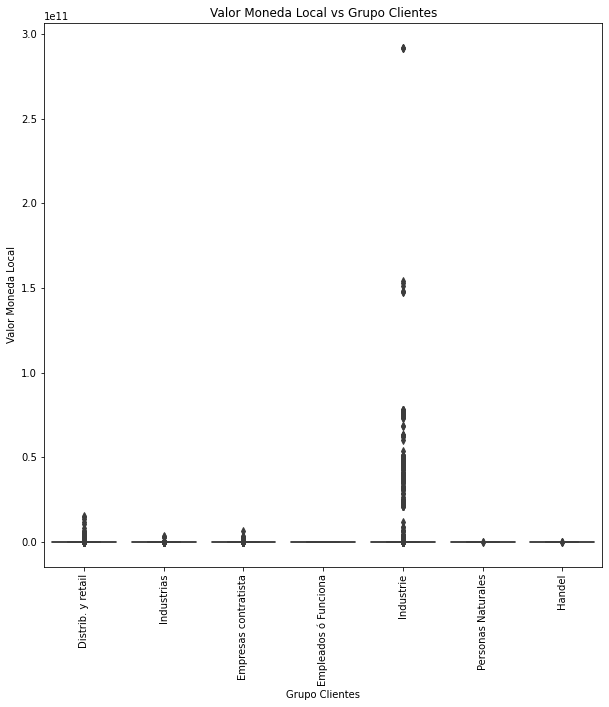

In [16]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Grupo Clientes', y = 'Valor Moneda Local', data = df_ventas) 

plt.title("Valor Moneda Local vs Grupo Clientes")
plt.xticks(rotation=90)

(array([0]), <a list of 1 Text major ticklabel objects>)

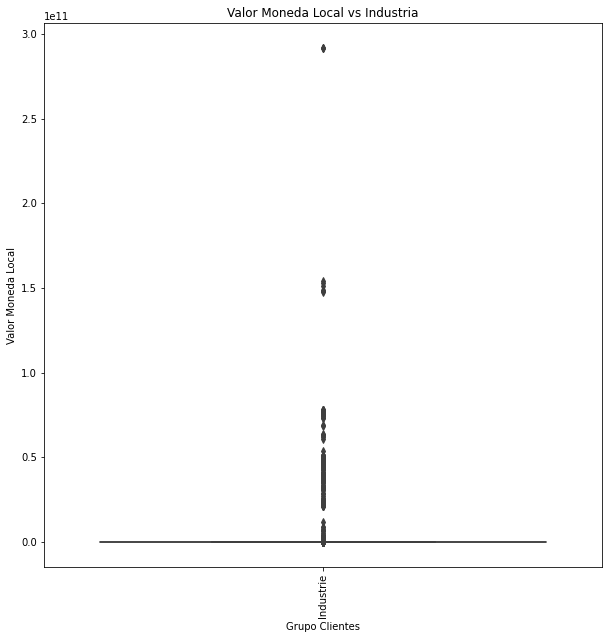

In [17]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Grupo Clientes', y = 'Valor Moneda Local', data = df_ventas[df_ventas['Grupo Clientes'] == 'Industrie']) 
#Data.boxplot(grid= False, column = ['pay'], by = ['gender'])

plt.title("Valor Moneda Local vs Industria")
plt.xticks(rotation=90)

As we can see there are a lot of Outliers in our data. That points could be real data or outliers, that will be solved with the support of Nexans in a future meeting.

**Cancelled orders dataset (hyphotesis)**

We are going to create a new dataset only with the cancelled orders. To create the new dataset we filter out by "Factura" column taking only values that are null or "0" or values in "Valor Moneda Local" column which are equal to "0".

*The cancelled orders represent aprox. 27% of the total orders reported.*

In [18]:
df_vcanceladas = df[(df_ventas["Factura"].isnull()) | (df["Factura"] == "0") | (df["Valor Moneda Local"] == 0)]
df_vcanceladas.head()

,Entrega,Documento de ventas,Factura,Remito,Nombre Destinatario Mcías,Destinatario mcia,Fecha Reparto,Posicion docto ventas,Estado aprobación factura,Empresa Transporte,Fecha Transporte,Fecha factura,Factura.1,Nota Cabecera,Fe.mov.mcía.real,T Flete,Acreedor,Material,Texto breve de material,Lote,Matricula,Tipo Carrete,Cantidad entrega,Un. medida venta,Peso bruto,Peso Bruto,Peso Tara,Peso Neto,Punto fin,Punto inicio,Ctd.clasificable,Fecha-tratamiento,Centro,MC Al Kg,MC Cu Kg,Moneda del documento,Nº de pedido,Nº de pedido.1,Número de material del cliente,Posición,Tipo de posición,Unidad-salida,Unidades Recepción,Valor Neto (USD),Nº ident.fis.1,Valor de Picking,Fecha de Pedido,Fecha Entrega,Stock a Pedidos,Precio Cliente,Precio Neto,Creado por,Vendedor,Grupo de material 2,Grupo Materiales 2,Grupo Clientes,Punto Expedicion,Ruta,Código EAN/UPC,Calle y número,Distrito,Población,Pais,Valor Moneda Local,Moneda,Incoterms,Nombre 1,Carrete,Valor Carrete,Precio
117,80790817,4.700040e+09,0,0.0,Almacenes Externos,CEDSA5020,9/01/2015,10,SIN FACTURA,0,0/01/1900,6/01/2015,0.0,0,6/01/2015,0,0,10027791,3X18+22AWG INST TFN 600V 90C PPa TC,CED-210079,HC4A231,0,300,M,"19,305",26,0,21,422,722,300,0/01/1900,5010,0,"7,77",0,0,0,0.0,900001,NLN,KG,0,0,8902096126,0,0/01/1900,6/01/2015,STOCK,0,0,0,0,0.0,0,0,Cedsa Bodega Comercial,0,0,0,0,0,Colombia,0,0,0,0.0,0.0,0,0
249,80791102,4.700040e+09,0,0.0,Almacenes Externos,CEDSA5020,10/01/2015,10,SIN FACTURA,0,0/01/1900,7/01/2015,0.0,KM 4 PLANTA EL TABOR BUENAVENTURA O.C No 41000...,7/01/2015,0,0,10014369,4/0 AWG ACSR (6/1) PENGUIN,1001068910,ME11A086,0,1500,M,"650,122",702,0,648,0,0,1500,0/01/1900,5010,"441,57",0,0,0,0,0.0,900004,NLN,KG,0,0,8902096126,0,0/01/1900,7/01/2015,STOCK,0,0,0,0,0.0,0,0,Cedsa Bodega Comercial,0,"7,70735E+12",PROVISORIA,0,0,Colombia,0,0,0,0.0,0.0,0,0
250,80791102,4.700040e+09,0,0.0,Almacenes Externos,CEDSA5020,10/01/2015,10,SIN FACTURA,0,0/01/1900,7/01/2015,0.0,KM 4 PLANTA EL TABOR BUENAVENTURA O.C No 41000...,7/01/2015,0,0,10014369,4/0 AWG ACSR (6/1) PENGUIN,1001068570,EP 11 B 339,0,1500,M,"650,122",703,0,649,0,0,1500,0/01/1900,5010,"441,57",0,0,0,0,0.0,900001,NLN,KG,0,0,8902096126,0,0/01/1900,7/01/2015,STOCK,0,0,0,0,0.0,0,0,Cedsa Bodega Comercial,0,"7,70735E+12",PROVISORIA,0,0,Colombia,0,0,0,0.0,0.0,0,0
251,80791102,4.700040e+09,0,0.0,Almacenes Externos,CEDSA5020,10/01/2015,10,SIN FACTURA,0,0/01/1900,7/01/2015,0.0,KM 4 PLANTA EL TABOR BUENAVENTURA O.C No 41000...,7/01/2015,0,0,10014369,4/0 AWG ACSR (6/1) PENGUIN,1001068864,ME11A109,0,1500,M,"650,122",706,0,652,0,0,1500,0/01/1900,5010,"441,57",0,0,0,0,0.0,900002,NLN,KG,0,0,8902096126,0,0/01/1900,7/01/2015,STOCK,0,0,0,0,0.0,0,0,Cedsa Bodega Comercial,0,"7,70735E+12",PROVISORIA,0,0,Colombia,0,0,0,0.0,0.0,0,0
252,80791102,4.700040e+09,0,0.0,Almacenes Externos,CEDSA5020,10/01/2015,10,SIN FACTURA,0,0/01/1900,7/01/2015,0.0,KM 4 PLANTA EL TABOR BUENAVENTURA O.C No 41000...,7/01/2015,0,0,10014369,4/0 AWG ACSR (6/1) PENGUIN,1001068865,ME11A101,0,1500,M,"650,122",716,0,648,0,0,1500,0/01/1900,5010,"441,57",0,0,0,0,0.0,900003,NLN,KG,0,0,8902096126,0,0/01/1900,7/01/2015,STOCK,0,0,0,0,0.0,0,0,Cedsa Bodega Comercial,0,"7,70735E+12",PROVISORIA,0,0,Colombia,0,0,0,0.0,0.0,0,0


In [19]:
df_vcanceladas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85583 entries, 117 to 344710
Data columns (total 70 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entrega                         85583 non-null  int64  
 1   Documento de ventas             85553 non-null  float64
 2   Factura                         24532 non-null  object 
 3   Remito                          7018 non-null   float64
 4   Nombre Destinatario Mcías       85583 non-null  object 
 5   Destinatario mcia               85583 non-null  object 
 6   Fecha Reparto                   85583 non-null  object 
 7   Posicion docto ventas           85583 non-null  int64  
 8   Estado aprobación factura       85583 non-null  object 
 9   Empresa Transporte              23266 non-null  object 
 10  Fecha Transporte                37572 non-null  object 
 11  Fecha factura                   85583 non-null  object 
 12  Factura.1                    

## First Relevant Variable Analysis (DF Ventas)

In [20]:
df_ventas["Grupo Clientes"].value_counts()

Distrib. y retail       189238
Empresas contratista     40711
Industrie                16059
Industrias                7880
Personas Naturales          19
Handel                      15
Empleados ó Funciona        11
Name: Grupo Clientes, dtype: int64

In [21]:
# amount of products
df_ventas['Texto breve de material'].unique().size

2850

## Sales per Year Analysis

In [22]:
# total sales
df_ventas['Valor Moneda Local'].sum()

37491212244099

In [23]:
# adding time columns
df_ventas['Fecha de Pedido'] = pd.to_datetime(df_ventas['Fecha de Pedido'], format="%d/%m/%Y")
df_ventas.insert(0, 'YEAR', pd.DatetimeIndex(df_ventas['Fecha de Pedido']).year)
df_ventas.insert(1, 'MONTH', pd.DatetimeIndex(df_ventas['Fecha de Pedido']).month)
df_ventas.insert(2, 'DAY', pd.DatetimeIndex(df_ventas['Fecha de Pedido']).day)
df_ventas.insert(3, 'WEEK', df_ventas['Fecha de Pedido'].dt.weekday)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
# Grouping by sales per year
year_df = df_ventas.groupby(['YEAR', 'MONTH']).agg({'Valor Moneda Local': 'sum'})
year_df['Valor Moneda Local'] = year_df['Valor Moneda Local']
year_df.reset_index(inplace = True)
year_df

,YEAR,MONTH,Valor Moneda Local
0,2014,11,147866306
1,2014,12,3089075379
2,2015,1,14346500831
3,2015,2,5486891903
4,2015,3,7246596993
...,...,...,...
66,2020,5,12254850082
67,2020,6,16352370495
68,2020,7,15782028931
69,2020,8,9109856718


### 'Valor Moneda local' through time (Months)

In [26]:
# The data before 2015 is excluded because is just a month (november) of 2019, and some data that belongs to the year 1900 (strange data).
df_ventas = df_ventas[df_ventas['YEAR']>2014]

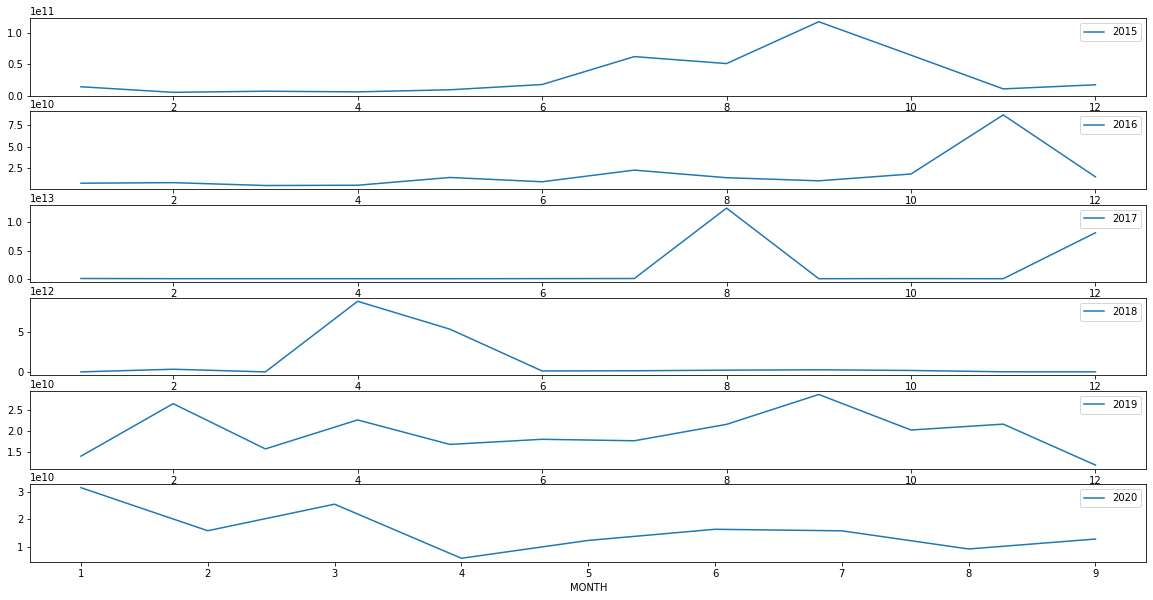

In [68]:
df_ventas_by_month = df_ventas.groupby(['YEAR', 'MONTH']).sum()['Valor Moneda Local']
fig, axes = plt.subplots(6, figsize=(20,10))
ax_idx = 0
for year in range(2015, 2021):
  year_g = df_ventas_by_month[year]
  sns.lineplot(x=year_g.index, y=year_g.values, ax=axes[ax_idx], label=year)
  
  ax_idx+=1;

### KG Per Year Analysis

The next plot allows us to see the behavior of the 'Peso Neto' over the months through the years since 2015 to 2020, and also allow us to compare the numbers.

In [50]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

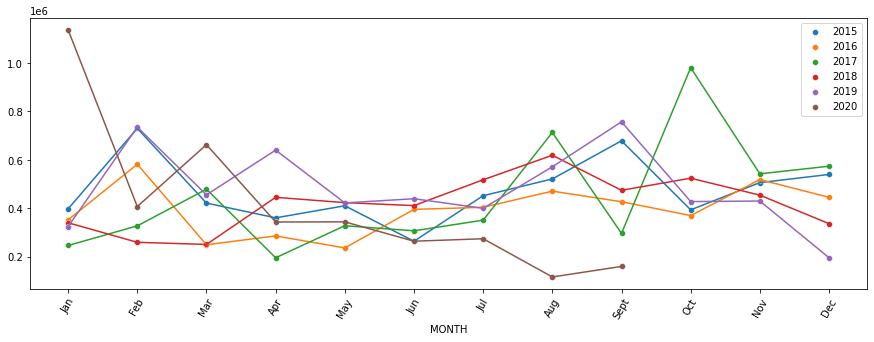

In [52]:
t = df_ventas.groupby(['YEAR', 'MONTH']).sum()['Peso Neto']
plt.figure(figsize=(15,5))
for year in range(2015, 2021):
    group = t[year]
    fig = sns.lineplot(x=group.index, y=group.values)
    sns.scatterplot(x=group.index, y=group.values, label=year)
    
plt.xticks(ticks=range(1,13), labels=months, rotation=60);

The next plot show the same data as the plot above, but in a continious line from January of 2015 to september of 2020. It's another approach to see the tendency of the data.

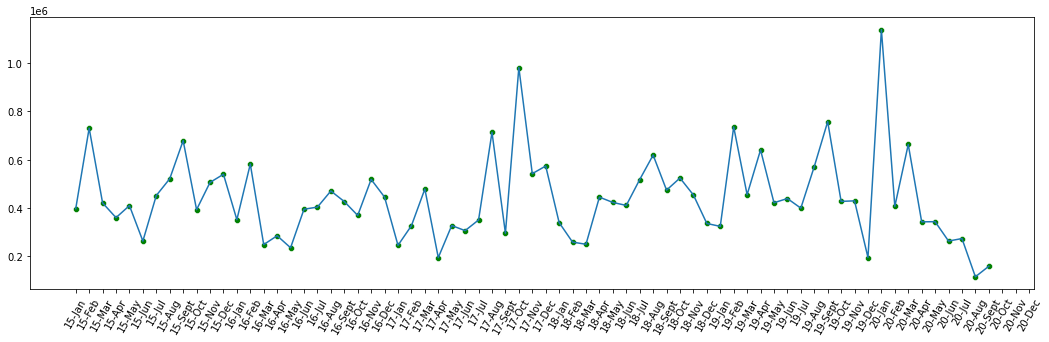

In [53]:
new_months = []
for y in range(15,21):
    for m in months:
        new_months.append(str(y)+'-'+m)

tend_line_data = t.droplevel(0)
tend_line_data.reset_index(drop=True, inplace=True)
plt.figure(figsize=(18,5))
sns.lineplot(x=tend_line_data.index, y=tend_line_data.values)
sns.scatterplot(x=tend_line_data.index, y=tend_line_data.values, color='green')
plt.xticks(ticks=range(0,72), labels=new_months, rotation=60);

##BEST SOLD PRODUCTS PER PRICE ( ITEM X PRICE)

Now, we can identify the best saled product in dataset. This give us an insight about what products and categories were the most significative products where the incomes come from.


In [28]:
f_price = df_ventas.groupby(["Texto breve de material"])['Valor Moneda Local'].sum().sort_values(ascending=False).reset_index()
print('BEST 10 SOLD PRODUCTS PER PRICE')
f_price.head(10)

BEST 10 SOLD PRODUCTS PER PRICE


,Texto breve de material,Valor Moneda Local
0,2/0 AWG ACSR (6/1) QUAIL,19337362770114
1,4AWG AL AA8000 THWN-2 TC 600V90C,9244983375678
2,4/0 AWG ACSR (6/1) PENGUIN,4103826387820
3,3X2+4 AWG ACOM.TREB PVC 600V 75C E,902744149653
4,C. 2/0 AWG (A) Cu DESNUDO DURO,875632087860
5,2x12 AWG CONT PVC 600V 90C TC CE1,315358297981
6,1X8+8AWG ACOMCONC XLPE600V90C XLPE USE-M,217340213388
7,A.8AWG Cu DESNUDO,138151629832
8,4AWG AL AA8000 THWN-2 TC 600V90C NEX NE,119954580058
9,C.500KCMIL (B) THHN/THWN-2TC 600V90ºC NE,52589227623


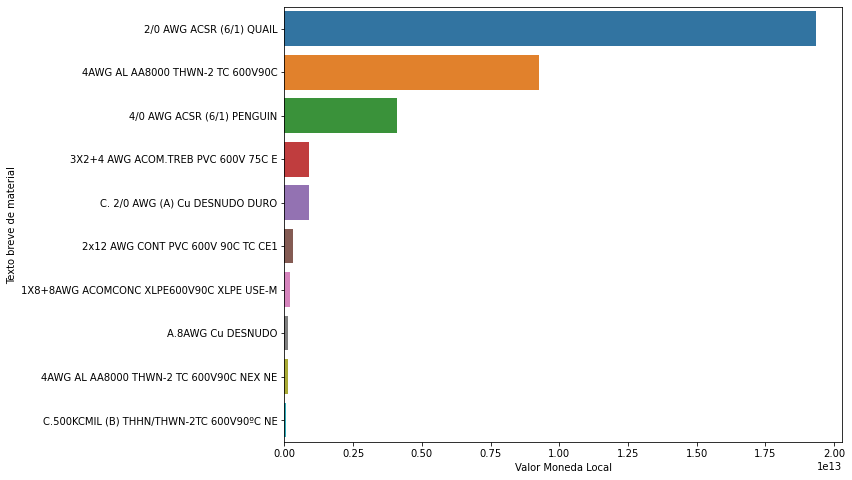

In [33]:
plt.figure(figsize=(10,8))
sns.barplot(y='Texto breve de material', x='Valor Moneda Local', data=f_price.head(10), orient='h');

In [34]:
f_weight = df_ventas.groupby(["Texto breve de material"])['Peso Neto'].sum().sort_values(ascending=False).reset_index()
print('Top-10 product woth more consumption')
f_weight.head(10)

Top-10 product woth more consumption


,Texto breve de material,Peso Neto
0,C.4/0AWG (B) THHN/THWN-2 TC 600V 90ºC NE,894158
1,C.500KCMIL (B) THHN/THWN-2TC 600V90ºC NE,753933
2,C.2AWG (B) THHN/THWN-2 TC 600V 90ºC NE,709099
3,C.4AWG (B) THHN/THWN-2 TC 600V 90ºC NE,708805
4,2X4/0+4/0AWG TPLEX AAC/AAAC XLPE 600V90C,677052
5,1X8+8 AWG ACOM.CONC XLPE 600V 90C,663018
6,C.1/0AWG (B) THHN/THWN-2 TC 600V 90ºC NE,607719
7,1X8+8AWG ACOMCONC XLPE600V90C XLPE USE-M,600587
8,C.2/0AWG (B) THHN/THWN-2 TC 600V 90ºC NE,566468
9,2X8+8 AWG ACOM.PLANA XLPE 600V 90C,555084


<p> <strong> Observations: </strong>
This data show us the top sold products in Nexans, the table shows that item *2/0 AWG ACSR (6/1) QUAIL * used in overhead power transmission lines in medium and high voltage (class AA) is the most popular product generating aproximatelly $19.337'362.770.114 COP, in the other hand there is a considerable gap between the first 3 products whith the rest of Nexan products inferring that the company could have a great variety of products but there are a few items that have a constant flow in the company or there was a big amount bought in one trade. Also, We also observe that cable 2X4/0+4/0AWG TPLEX AAC/AAAC XLPE 600V90C is the highest demand.</p>

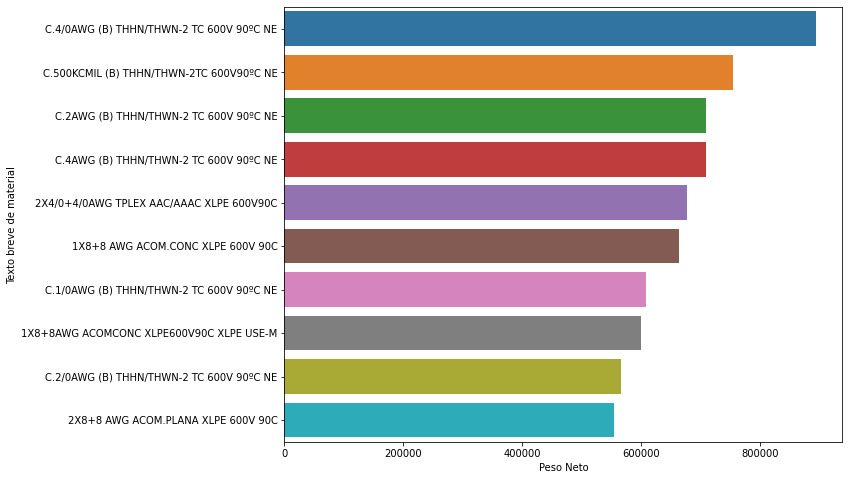

In [37]:
plt.figure(figsize=(10,8))
sns.barplot(y='Texto breve de material', x='Peso Neto', data=f_weight.head(10), orient='h');

##LEAST SOLD PRODUCTS PER PRICE ( ITEM X PRICE)

In [38]:
f_price_des = df_ventas.groupby(["Texto breve de material"])['Valor Moneda Local'].sum().sort_values(ascending=True).reset_index()
f_price_des.head(10)

,Texto breve de material,Valor Moneda Local
0,Desperdicio XLPE - MONOSIL,32222
1,4/0AWGACSR SEMIAISLADOXLPE-TK 35KV 3C EA,46289
2,Desperdicio HFFR / LSHF,46550
3,18AWG MTW-ILUMINA 600V105ºC PVC-NA R-100,54200
4,Desperdicio HFFR - LSHF,56101
5,20 AWG VEHICULO 50V 75ºC PVC-VE R100,67000
6,12AWG FREETOX LSHF 600V 90C TC NE,72900
7,14 AWG VEHICULO GPT 50V 75ºC PVC-GR,79640
8,LM Bisagras cassette fusión 16x SK,81504
9,12AWG FREETOX LHFR-LS 600V 90C TC NE,89900


##LEAST SOLD PRODUCTS PER PRICE ( ITEM X PRICE)

In [39]:
f_price_des = df_ventas.groupby("Texto breve de material")['Valor Moneda Local'].sum().sort_values(ascending=True).reset_index()
f_price_des.head(10)

,Texto breve de material,Valor Moneda Local
0,Desperdicio XLPE - MONOSIL,32222
1,4/0AWGACSR SEMIAISLADOXLPE-TK 35KV 3C EA,46289
2,Desperdicio HFFR / LSHF,46550
3,18AWG MTW-ILUMINA 600V105ºC PVC-NA R-100,54200
4,Desperdicio HFFR - LSHF,56101
5,20 AWG VEHICULO 50V 75ºC PVC-VE R100,67000
6,12AWG FREETOX LSHF 600V 90C TC NE,72900
7,14 AWG VEHICULO GPT 50V 75ºC PVC-GR,79640
8,LM Bisagras cassette fusión 16x SK,81504
9,12AWG FREETOX LHFR-LS 600V 90C TC NE,89900


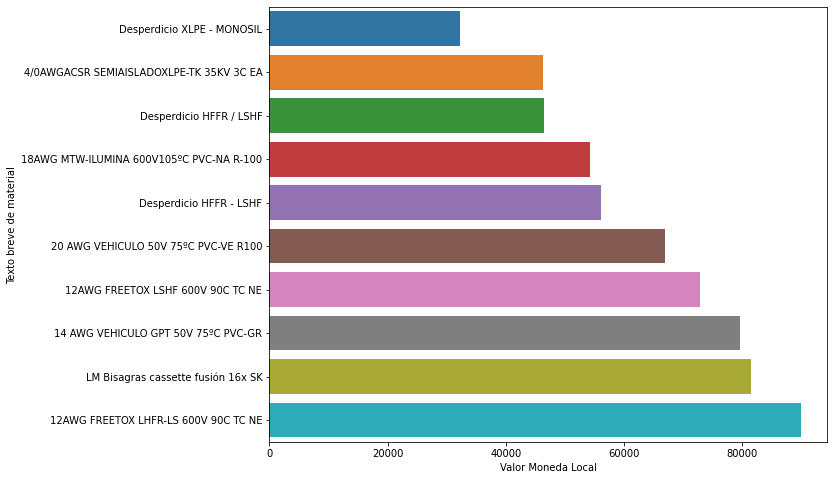

In [40]:
plt.figure(figsize=(10,8))
sns.barplot(y='Texto breve de material', x='Valor Moneda Local', data=f_price_des.head(10), orient='h');

<p><strong>Obsevations:</strong> these items are the least popoular at the moment of being sell in Nexans, we can perceive that there is waste and vehicule wires are not as popular as other references. </p>

##BEST SOLD PRODUCTS PER Quantity ( ITEM X CUANTITY KG)

In [41]:
df_itemkg = df_ventas.groupby("Texto breve de material")['Peso Neto'].sum().sort_values(ascending=False).reset_index()
df_itemkg.head(10)

,Texto breve de material,Peso Neto
0,C.4/0AWG (B) THHN/THWN-2 TC 600V 90ºC NE,894158
1,C.500KCMIL (B) THHN/THWN-2TC 600V90ºC NE,753933
2,C.2AWG (B) THHN/THWN-2 TC 600V 90ºC NE,709099
3,C.4AWG (B) THHN/THWN-2 TC 600V 90ºC NE,708805
4,2X4/0+4/0AWG TPLEX AAC/AAAC XLPE 600V90C,677052
5,1X8+8 AWG ACOM.CONC XLPE 600V 90C,663018
6,C.1/0AWG (B) THHN/THWN-2 TC 600V 90ºC NE,607719
7,1X8+8AWG ACOMCONC XLPE600V90C XLPE USE-M,600587
8,C.2/0AWG (B) THHN/THWN-2 TC 600V 90ºC NE,566468
9,2X8+8 AWG ACOM.PLANA XLPE 600V 90C,555084


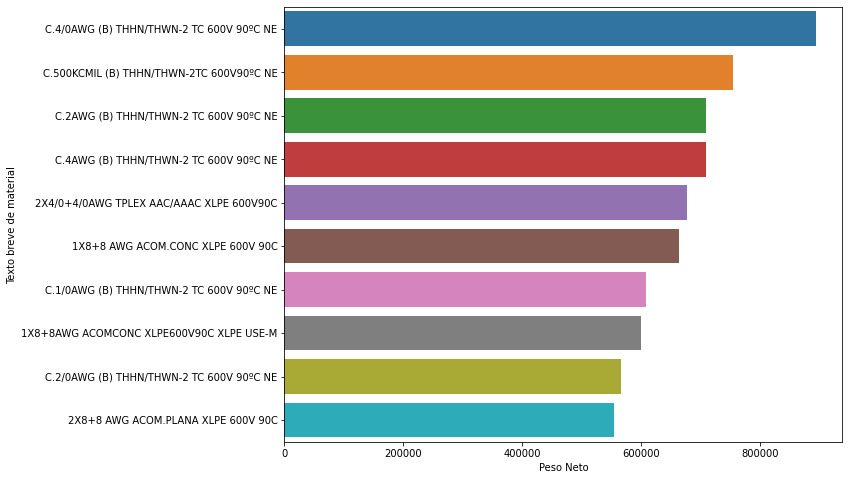

In [42]:
plt.figure(figsize=(10,8))
sns.barplot(y='Texto breve de material', x='Peso Neto', data=df_itemkg.head(10), orient='h');

### Takeaways

On this Jupyter Notebook we have deep-dived on the data provided by Nexans Colombia, and described the columns of interest and plotted the aggregated sales through time. We still need to understand from the company why there are NaN values on this database and whether we should take them into consideration on our analysis or not. 
We take a look into the raw data in order to determinate if there is enough information to build the best estimator forecast based on sales. We suggest to include stocks yields from copper and aluminum prices and USD in timeline.